In [2]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import missingno as msno

In [3]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [4]:
# Download latest version


path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Anzahl Zeilen: 1296675
Anzahl Spalten: 24


In [5]:
# Erste 10 Zeilen
ds.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,28705.0000
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,83236.0000
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,22844.0000
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.6300,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.6534,-76.1527,0,17972.0000
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.5400,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.1627,-100.1534,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.6500,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.9481,-78.5403,0,22644.0000
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.2700,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.3518,-79.9581,0,15236.0000
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.3900,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.1792,-87.4854,0,42442.0000


In [6]:
# Infos über Spalten
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# Deskriptive Stats für numerische Spalten
ds.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1100702.0000
mean,648337.0000,417192042079726656.0000,70.3510,48800.6711,38.5376,-90.2263,88824.4406,1349243636.7261,38.5373,-90.2265,0.0058,46825.7542
std,374317.9745,1308806447000240384.0000,160.3160,26893.2225,5.0758,13.7591,301956.3607,12841278.4234,5.1098,13.7711,0.0759,25834.0012
min,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000,1001.0000
25%,324168.5000,180042946491150.0000,9.6500,26237.0000,34.6205,-96.7980,743.0000,1338750742.5000,34.7336,-96.8973,0.0000,25114.0000
50%,648337.0000,3521417320836166.0000,47.5200,48174.0000,39.3543,-87.4769,2456.0000,1349249747.0000,39.3657,-87.4384,0.0000,45860.0000
75%,972505.5000,4642255475285942.0000,83.1400,72042.0000,41.9404,-80.1580,20328.0000,1359385375.5000,41.9572,-80.2368,0.0000,68319.0000
max,1296674.0000,4992346398065154048.0000,28948.9000,99783.0000,66.6933,-67.9503,2906700.0000,1371816817.0000,67.5103,-66.9509,1.0000,99403.0000


In [8]:
# Anzahl unique Werte pro Spalte
ds.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
merch_zipcode              28336
dtype: int64

# Beschreibung der einzelnen Spalten

- Unnamed: Laufende Nummer/Index (keine analytische Bedeutung)
- trans_date_trans_time; Datum und Uhrzeit der Transaktion
- cc_num: Verschlüsselter Kreditkartennummern-Identifier (nicht die echte Kartennummer)
- merchant: Name oder Kennung des Händlers, bei dem die Transaktion stattfand
- category: Kategorie der Transaktion, beschreibt, welche Art von Geschäft oder Kaufvorgang es war
- amt: Betrag der Transaktion in US-Dollar
- first: Vorname des Karteninhabers
- last: Nachname des Karteninhabers
- gender: Geschlecht des Karteninhabers
- street: Strasse und Hausnummer des Karteninhabers
- city: Stadt, in der der Karteninhaber wohnt
- state: US-Bundesstaat des Karteninhabers
- zip: Postleitzahl der Adresse des Karteninhabers
- lat: geografische Breite (Latitude) des Wohnortes des Karteninhabers
- long: geografische Länge (Longitude) des Wohnortes des Karteninhabers
- city_pop: Einwohnerzahl der Stadt, in der der Karteninhaber wohnt
- job: Beruf des Karteninhabers
- dob: Geburtsdatum
- trans_num: Eindeutige ID jeder Transaktion
- unix_time: Zeistempel der Transaktion im UNIX-Zeitformat
- merch_lat: geografische Breite des Händlers
- merch_long: geografische Länge des Händlers
- is_fraud: gibt an ob die Transaktion betrügerisch war (1) oder legitim
- merch_zipcode: Postleitzahl des Händlers 

In [9]:
# Eindeutige Werte der kategorialen Variablen
categorical_cols = [
    "trans_date_trans_time",
    "merchant",
    "category",
    "first",
    "last",
    "gender",
    "street",
    "city",
    "state",
    "job",
    "dob",
    "trans_num"
]

for col in categorical_cols:
    print(f"{col}:\n{ds[col].unique()}\n")

trans_date_trans_time:
['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']

merchant:
['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyett

### Messniveaus der kategorischen Spalten

- trans_date_trans_time: Ordinal (zeitliche Reihenfolge vorhanden)
- merchant: Nominal (Bezeichnung des Händlers ohne Ordnung)
- category: Nominal (Kategorien wie „gas_transport“, „grocery_pos“ usw.)
- first: Nominal (Vorname, reine Kategorie)
- last: Nominal (Nachname, reine Kategorie)
- gender: Nominal (Geschlecht: M/F, keine Rangordnung)
- street: Nominal (Straßenname, keine Ordnung)
- city: Nominal (Städtename, keine Ordnung)
- state: Nominal (Bundesstaat, keine Ordnung)
- job: Nominal (Berufsbezeichnung, keine Ordnung)
- dob: Ordinal (Datum kann zeitlich geordnet werden)
- trans_num: Nominal (eindeutige Transaktions-ID ohne Ordnung)

### Messniveaus der numerischen Spalten

- Unnamed: Ordinal (laufende Nummer, Reihenfolge vorhanden)
- cc_num: Nominal (ID-ähnliche Nummer, keine metrische Bedeutung)
- amt: Ratio (Transaktionsbetrag mit absolutem Nullpunkt, Verhältnisse interpretierbar)
- zip: Nominal (Postleitzahl, keine metrische Bedeutung)
- lat: Interval (geografische Breite – Abstände messbar, kein absoluter Nullpunkt)
- long: Interval (geografische Länge – Abstände messbar, kein absoluter Nullpunkt)
- city_pop: Ratio (Einwohnerzahl mit absolutem Nullpunkt)
- unix_time: Ratio (Zeit in Sekunden seit Epoch mit absolutem Nullpunkt)
- merch_lat: Interval (geografische Breite des Händlers)
- merch_long: Interval (geografische Länge des Händlers)
- is_fraud: Nominal (Klassifikation: 0 = nicht betrügerisch, 1 = betrügerisch)
- merch_zipcode: Nominal (Postleitzahl des Händlers, keine metrische Bedeutung)

# Missing Values

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64
Unnamed: 0               0.0000
trans_date_trans_time    0.0000
cc_num                   0.0000
merchant                 0.0000
category                 0.0000
amt                      0.0000
first                    0.

<Axes: >

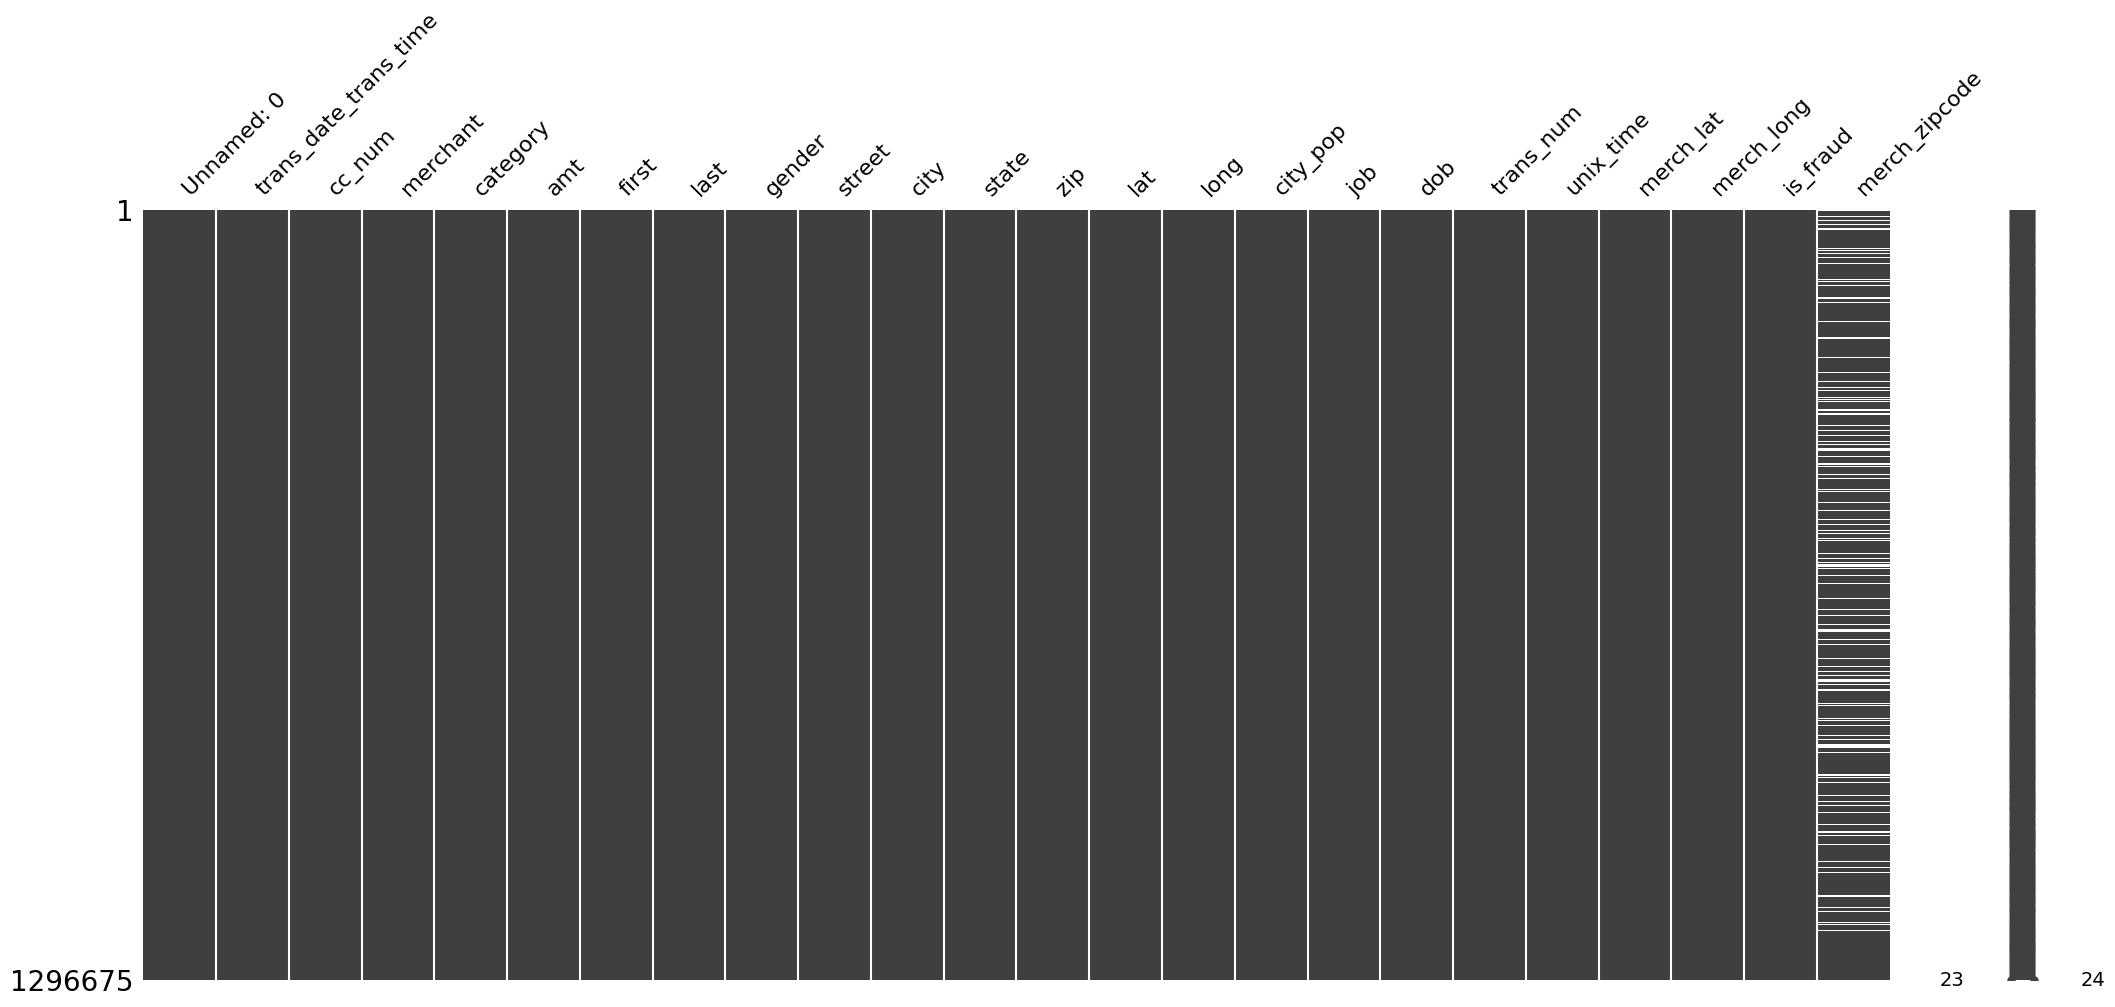

In [5]:
#sns.heatmap(ds.isnull())

print(ds.isna().sum())
print(ds.isna().mean() * 100)

msno.matrix(ds)

Im Datensatz sind fast keine fehlenden Werte vorhanden.
Nur die Spalte merch_zipcode weist etwa 195'973 fehlende Werte auf, während alle anderen 23 Spalten vollständig ausgefüllt sind.

Interpretation:
- Das bedeutet, dass der Datensatz insgesamt sehr sauber und vollständig ist.
- Die fehlenden Werte in merch_zipcode lassen sich damit erklären, dass nicht jeder Händlerstandort über eine Postleitzahl verfügt oder diese nicht erfasst wurde (z. B. bei Online-Händlern, internationalen Transaktionen oder unvollständigen Datenquellen).
- Da die geografischen Informationen (merch_lat, merch_long) vorhanden sind, kann der fehlende ZIP-Code oft toleriert oder durch Geocoding ergänzt werden, falls nötig.

In [12]:
display(ds[ds["merch_zipcode"].isna()])

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,NaN
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,NaN
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.5400,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.1627,-100.1534,0,NaN
13,13,2019-01-01 00:07:27,5559857416065248,fraud_Kiehn Inc,grocery_pos,96.2900,Jack,Hill,M,5916 Susan Bridge Apt. 939,Grenada,CA,96038,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,1325376447,41.6575,-122.2303,0,NaN
14,14,2019-01-01 00:09:03,3514865930894695,fraud_Beier-Hyatt,shopping_pos,7.7700,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,1325376543,32.8633,-106.5202,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296631,1296631,2020-06-21 11:53:11,4430881574719618,"fraud_Christiansen, Goyette and Schamberger",gas_transport,47.9300,Alicia,Morales,F,4456 Dunn Roads,Meredith,CO,81642,39.3199,-106.6596,61,Public relations account executive,1939-11-04,61c98cca889eb14ac300b2d445a95dd9,1371815591,39.9054,-107.1831,0,NaN
1296636,1296636,2020-06-21 11:55:56,3534330126107879,"fraud_Lockman, West and Runte",grocery_pos,98.9800,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,MT,59014,45.2857,-108.9082,1446,Chartered loss adjuster,1978-01-15,e064f1755c6491e6196a8798d3cd4c4c,1371815756,45.2551,-108.9658,0,NaN
1296639,1296639,2020-06-21 11:57:21,4449530933957323,"fraud_Mosciski, Gislason and Mertz",grocery_pos,135.5100,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,CA,94971,38.2427,-122.9145,337,Occupational psychologist,1954-07-05,2f518db072a442edd69b6d9880b2b390,1371815841,38.9872,-123.9017,0,NaN
1296646,1296646,2020-06-21 12:02:13,5359543825610251,fraud_Graham and Sons,health_fitness,110.3200,Michael,Francis,M,1833 Jeanette Stravenue,Belgrade,MT,59714,45.7801,-111.1439,18182,"Engineer, drilling",1975-06-29,47cf62dfb17e95973f634a2d269c7cb6,1371816133,44.8751,-111.2901,0,NaN


| Spaltenname | Beschreibung | Datentyp | Anzahl Unique Werte | Messniveau | Missing Values |
|--------------|--------------|-----------|----------------------|--------------|----------------|
| Unnamed: 0 | Laufende Nummer / Index (keine analytische Bedeutung) | int64 | 1,296,675 | ordinal | 0 |
| trans_date_trans_time | Datum und Uhrzeit der Transaktion | object | 1,274,791 | ordinal | 0 |
| cc_num | Verschlüsselter Kreditkartennummern-Identifier | int64 | 983 | nominal | 0 |
| merchant | Name oder Kennung des Händlers | object | 693 | nominal | 0 |
| category | Kategorie der Transaktion (Art des Geschäfts oder Kaufs) | object | 14 | nominal | 0 |
| amt | Betrag der Transaktion in US-Dollar | float64 | 52,928 | ratio | 0 |
| first | Vorname des Karteninhabers | object | 352 | nominal | 0 |
| last | Nachname des Karteninhabers | object | 481 | nominal | 0 |
| gender | Geschlecht des Karteninhabers | object | 2 | nominal | 0 |
| street | Straße und Hausnummer des Karteninhabers | object | 983 | nominal | 0 |
| city | Stadt des Karteninhabers | object | 894 | nominal | 0 |
| state | US-Bundesstaat des Karteninhabers | object | 51 | nominal | 0 |
| zip | Postleitzahl der Adresse des Karteninhabers | int64 | 970 | nominal | 0 |
| lat | Geografische Breite (Wohnort) | float64 | 968 | interval | 0 |
| long | Geografische Länge (Wohnort) | float64 | 969 | interval | 0 |
| city_pop | Einwohnerzahl der Stadt des Karteninhabers | int64 | 879 | ratio | 0 |
| job | Beruf des Karteninhabers | object | 494 | nominal | 0 |
| dob | Geburtsdatum | object | 968 | ordinal | 0 |
| trans_num | Eindeutige ID der Transaktion | object | 1,296,675 | nominal | 0 |
| unix_time | Zeitstempel im UNIX-Format | int64 | 1,274,823 | ratio | 0 |
| merch_lat | Geografische Breite des Händlers | float64 | 1,247,805 | interval | 0 |
| merch_long | Geografische Länge des Händlers | float64 | 1,275,745 | interval | 0 |
| is_fraud | Betrugsindikator (1 = Betrug, 0 = legitim) | int64 | 2 | nominal | 0 |
| merch_zipcode | Postleitzahl des Händlers | float64 | 28,336 | nominal | 195,973 |

# Bias

### Sampling Bias

In [ ]:
# Klassenungleichgewicht
print("Klassenverteilung is_fraud:\n", ds['is_fraud'].value_counts(normalize=True))

# Verteilung nach zentralen Gruppenmerkmalen
for col in ['gender', 'state', 'category', 'city']:
    vc = ds[col].value_counts(normalize=True).head(20)
    print(f"\nTop-Verteilung {col} (Anteil):\n", vc)

# Altersverteilung (als Proxy)
age = (pd.Timestamp('2019-01-01') - pd.to_datetime(ds['dob'])).dt.days/365
print("\nAlter (Beschreibung):\n", age.describe())

# Fraud-Rate pro Gruppe (zeigt potentielle Über-/Unterrepräsentation)
for col in ['gender', 'state', 'category']:
    rate = ds.groupby(col)['is_fraud'].median().sort_values(ascending=False)
    print(f"\nFraud-Rate nach {col}:\n", rate.head(10))

Klassenverteilung is_fraud:
 is_fraud
0   0.9942
1   0.0058
Name: proportion, dtype: float64

Top-Verteilung gender (Anteil):
 gender
F   0.5474
M   0.4526
Name: proportion, dtype: float64

Top-Verteilung state (Anteil):
 state
TX   0.0732
NY   0.0644
PA   0.0616
CA   0.0435
OH   0.0358
MI   0.0356
IL   0.0334
FL   0.0329
AL   0.0316
MO   0.0296
MN   0.0245
AR   0.0240
NC   0.0233
WI   0.0226
VA   0.0226
SC   0.0225
KY   0.0220
IN   0.0213
IA   0.0208
OK   0.0206
Name: proportion, dtype: float64

Top-Verteilung category (Anteil):
 category
gas_transport    0.1015
grocery_pos      0.0954
home             0.0949
shopping_pos     0.0900
kids_pets        0.0872
shopping_net     0.0752
entertainment    0.0725
food_dining      0.0705
personal_care    0.0700
health_fitness   0.0662
misc_pos         0.0614
misc_net         0.0488
grocery_net      0.0351
travel           0.0312
Name: proportion, dtype: float64

Top-Verteilung city (Anteil):
 city
Birmingham     0.0043
San Antonio    0.0040
Utic



- **Klassenverteilung:**  
  Der Datensatz weist eine sehr starke Klassenungleichheit auf, mit 99.42 % legitimen und nur 0.58 % betrügerischen Transaktionen. Diese extreme Imbalance führt dazu, dass ein Modell, das auf diesen Daten trainiert wird, tendenziell legitime Transaktionen bevorzugt und viele Fraud-Fälle übersieht. Dadurch entsteht ein klarer Sampling Bias, da die Stichprobe das tatsächliche Verhältnis von Betrug zu Nicht-Betrug im realen Zahlungsverkehr nicht repräsentiert.

- **Geschlechterverteilung:**  
  Frauen sind mit 54.7 % leicht überrepräsentiert, während Männer 45.3 % ausmachen. Die Fraud-Rate ist bei Männern geringfügig höher (0.64 %) als bei Frauen (0.53 %). Diese Unterschiede sind zwar relativ gering, könnten aber dennoch darauf hinweisen, dass bestimmte demografische Gruppen in der Datenerhebung etwas stärker vertreten sind. Der Bias im Hinblick auf das Geschlecht ist jedoch vergleichsweise gering und dürfte die Modellergebnisse nur minimal beeinflussen.

- **Geografische Verteilung:**  
  Es zeigt sich eine deutliche Ungleichheit in der regionalen Abdeckung. Staaten wie Texas, New York, Pennsylvania und Kalifornien sind stark überrepräsentiert, während andere Regionen kaum vorkommen. Auffällig ist insbesondere Delaware, das eine Fraud-Rate von 100 % aufweist, was auf eine sehr kleine Fallzahl schließen lässt. Diese ungleichmäßige regionale Verteilung deutet auf einen Sampling Bias nach geographischer Herkunft hin. Ein Modell könnte dadurch in stark vertretenen Regionen besser funktionieren als in unterrepräsentierten.

- **Kategorienverteilung:**  
  Die häufigsten Transaktionen stammen aus den Kategorien „gas_transport“, „grocery_pos“, „home“ und „shopping_pos“. Besonders hohe Fraud-Raten finden sich dagegen in „shopping_net“ und „misc_net“, also bei Online-Transaktionen. Da der Datensatz überwiegend POS-Transaktionen enthält, sind Online-Transaktionen deutlich unterrepräsentiert. Dies führt zu einem Sampling Bias nach Transaktionsart und kann dazu führen, dass ein Modell Betrug bei Online-Einkäufen schlechter erkennt.

- **Altersstruktur:**  
  Das Durchschnittsalter der Karteninhaber liegt bei rund 45 Jahren, mit einer Spanne von 14 bis 94 Jahren. Die Altersverteilung ist relativ breit und gleichmäßig, sodass in diesem Bereich kein signifikanter Bias erkennbar ist. Alle Altersgruppen scheinen ausreichend berücksichtigt zu sein.

- **Gesamtschlussfolgerung:**  
  Insgesamt zeigt der Datensatz mehrere Formen von Sampling Bias. Besonders deutlich sind die Verzerrungen durch das extreme Klassenungleichgewicht, die ungleiche geographische Abdeckung und die unbalancierte Verteilung der Transaktionskategorien. Diese Faktoren führen dazu, dass bestimmte Gruppen, Regionen und Transaktionstypen im Modell überrepräsentiert oder unterrepräsentiert sind, was die Generalisierbarkeit der Ergebnisse beeinträchtigen kann.


### Survivorship Bias

In [ ]:
# Zeitstempel vorbereiten
ds['trans_date_trans_time'] = pd.to_datetime(ds['trans_date_trans_time'])

# 1. Zeitraum der Transaktionen prüfen
ds['_date'] = ds['trans_date_trans_time'].dt.date
daily_counts = ds.groupby('_date')['trans_num'].count()
print("Zeitraum der Transaktionen:")
print("Von:", daily_counts.index.min(), "bis:", daily_counts.index.max())
print("Anzahl Tage im Datensatz:", len(daily_counts))

# 2. Prüfen, ob es Lücken im Zeitraum gibt (Tage ohne Transaktionen)
date_range = pd.date_range(daily_counts.index.min(), daily_counts.index.max(), freq='D')
missing_days = set(date_range.date) - set(daily_counts.index)
print("Fehlende Tage ohne Transaktionen:", len(missing_days))

# 3. Lebensdauer pro Kreditkarte (Anfang und Ende der Transaktionen)
card_lifetime = ds.groupby('cc_num').agg(
    first_transaction=('trans_date_trans_time', 'min'),
    last_transaction=('trans_date_trans_time', 'max'),
    num_transactions=('trans_num', 'count')
)
card_lifetime['lifespan_days'] = (card_lifetime['last_transaction'] - card_lifetime['first_transaction']).dt.days

# Statistische Auswertung
print("\nLebensdauer der Karten (Tage):")
print(card_lifetime['lifespan_days'].describe())
print("\nTransaktionen pro Karte:")
print(card_lifetime['num_transactions'].describe())

# 4. Anteil kurzlebiger Karten (z. B. ≤ 1 Tag)
short_cards = (card_lifetime['lifespan_days'] <= 1).mean()
print("\nAnteil Karten mit Lebensdauer ≤ 1 Tag:", short_cards)

Zeitraum der Transaktionen:
Von: 2019-01-01 bis: 2020-06-21
Anzahl Tage im Datensatz: 537
Fehlende Tage ohne Transaktionen: 1

Lebensdauer der Karten (Tage):
count   983.0000
mean    495.1139
std     142.0909
min       0.0000
25%     535.0000
50%     536.0000
75%     537.0000
max     537.0000
Name: lifespan_days, dtype: float64

Transaktionen pro Karte:
count    983.0000
mean    1319.0997
std      812.2359
min        7.0000
25%      525.0000
50%     1054.0000
75%     2025.0000
max     3123.0000
Name: num_transactions, dtype: float64

Anteil Karten mit Lebensdauer ≤ 1 Tag: 0.0762970498474059




- **Zeitraum der Transaktionen:**  
  Der Datensatz deckt den Zeitraum vom **1. Januar 2019 bis zum 21. Juni 2020** ab, also rund eineinhalb Jahre. In diesem Zeitraum gibt es nur **einen Tag ohne Transaktionen**, was darauf hinweist, dass die Daten nahezu vollständig über den gesamten Zeitraum erfasst wurden. Ein fehlender Tag ist statistisch vernachlässigbar und deutet nicht auf systematische Auslassungen hin. Somit ist der zeitliche Abdeckungsgrad insgesamt sehr gut.

- **Lebensdauer der Kreditkarten:**  
  Die durchschnittliche Lebensdauer einer Karte beträgt **495 Tage**, während der Median bei **536 Tagen** liegt. Das zeigt, dass die meisten Karten über den gesamten Zeitraum hinweg aktiv sind. Die relativ geringe Standardabweichung (142 Tage) weist darauf hin, dass es nur wenige Karten mit deutlich kürzerer Aktivität gibt. Der maximale Wert von 537 Tagen entspricht der gesamten Laufzeit des Datensatzes, was bedeutet, dass ein Großteil der Karten über die gesamte Beobachtungsdauer hinweg erfasst wurde.

- **Kurzlebige Karten:**  
  Der Anteil von Karten mit einer Lebensdauer von **≤ 1 Tag** beträgt **7.6 %**. Diese Karten erscheinen nur sehr kurzzeitig im Datensatz, möglicherweise aufgrund von einmaligen Transaktionen, neu ausgestellten Karten oder frühzeitig deaktivierten Konten. Diese geringe, aber vorhandene Gruppe deutet darauf hin, dass nicht alle Karten gleichmäßig lange beobachtet wurden. Kurzlebige oder inaktive Karten sind also etwas unterrepräsentiert.

- **Transaktionen pro Karte:**  
  Durchschnittlich gibt es **1.319 Transaktionen pro Karte**, mit einer sehr großen Spannweite von **7 bis 3.123 Transaktionen**. Der Median liegt bei **1.054 Transaktionen**, was darauf hindeutet, dass viele Karten regelmäßig genutzt wurden. Dennoch zeigen die hohen Extremwerte, dass einige wenige Karten besonders häufig verwendet wurden, während andere kaum Transaktionen aufweisen. Dadurch entsteht eine Verzerrung zugunsten von „aktiven“ Karteninhabern.

- **Interpretation in Bezug auf Survivorship Bias:**  
  Da der Datensatz überwiegend Karten enthält, die über einen langen Zeitraum aktiv waren, liegt ein gewisser **Survivorship Bias** vor. Karten, die frühzeitig deaktiviert, selten genutzt oder nur kurzfristig aktiv waren, sind in der Datenbasis weniger stark vertreten. Dadurch konzentriert sich die Datenerfassung auf „überlebende“, also langfristig aktive Karten. Ein Modell, das auf diesen Daten trainiert wird, erlernt vor allem die Muster von aktiven Karten und hat möglicherweise Schwierigkeiten, das Verhalten von neuen oder kurzzeitig genutzten Karten korrekt zu bewerten. 

- **Fazit:**  
  Insgesamt ist der Datensatz zeitlich gut abgedeckt, zeigt aber einen **leichten Survivorship Bias**, da vor allem langfristig aktive Karten enthalten sind. Karten mit kurzer Lebensdauer oder wenigen Transaktionen sind unterrepräsentiert, was die Modellleistung in diesen Fällen einschränken kann.

### Confirmation Bias

In [ ]:
# Gesamt-Fraud-Rate
overall = ds['is_fraud'].mean()
print(f"Gesamt-Fraud-Rate: {overall:.2%}")

# Kategorien prüfen
tab_cat = ds.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
print("\nFraud-Rate je Kategorie:\n", (tab_cat * 100).round(2))

# Vereinfachter Kanalvergleich
ds['channel'] = np.where(ds['category'].str.contains('_net', na=False), 'online',
                 np.where(ds['category'].str.contains('_pos', na=False), 'pos', 'sonstiges'))

tab_channel = ds.groupby('channel')['is_fraud'].mean().sort_values(ascending=False)
print("\nFraud-Rate je Channel:\n", (tab_channel * 100).round(2))

print("\nFraud nach Bundesstaat:\n", (ds.groupby('state')['is_fraud'].count().sort_values(ascending=False)))

# Einfache Indizien (mind. doppelt so hoch wie Gesamt)
print("\nMögliche Confirmation-Bias-Indizien (Rate ≥ 2x Gesamt):")
for col in ['category', 'channel']:
    auffaellig = ds.groupby(col)['is_fraud'].mean()
    auffaellig = auffaellig[auffaellig >= 2 * overall]
    if not auffaellig.empty:
        print(f"\n{col}:\n", (auffaellig * 100).round(2))
    else:
        print(f"\n{col}: keine auffälligen Gruppen")

Gesamt-Fraud-Rate: 0.58%

Fraud-Rate je Kategorie:
 category
shopping_net     1.7600
misc_net         1.4500
grocery_pos      1.4100
shopping_pos     0.7200
gas_transport    0.4700
misc_pos         0.3100
grocery_net      0.2900
travel           0.2900
entertainment    0.2500
personal_care    0.2400
kids_pets        0.2100
food_dining      0.1700
home             0.1600
health_fitness   0.1500
Name: is_fraud, dtype: float64

Fraud-Rate je Channel:
 channel
online      1.3400
pos         0.8900
sonstiges   0.2500
Name: is_fraud, dtype: float64

Fraud nach Bundesstaat:
 state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786

- Die Gesamt-Fraud-Rate beträgt 0.58 %.  
  Mehrere Kategorien, insbesondere "shopping_net" (1.76 %), "misc_net" (1.45 %) und "grocery_pos" (1.41 %), liegen deutlich über diesem Wert.  
  Auch der Channel "online" zeigt mit 1.34 % eine mehr als doppelt so hohe Fraud-Rate wie der Gesamtdurchschnitt.

- Diese Unterschiede könnten auf einen Confirmation Bias hindeuten, da Online-Transaktionen und bestimmte Kaufkategorien oft als riskanter gelten.  
  Wenn die Labels ("Fraud" oder "Nicht-Fraud") auf subjektiven Einschätzungen oder Erfahrungswerten beruhen, wäre es möglich, dass diese Vorannahmen dazu geführt haben, dass Online-Transaktionen häufiger als Betrug eingestuft wurden.

- Allerdings können diese Unterschiede auch reale Ursachen haben.  
  Online-Käufe sind in der Praxis tatsächlich häufiger Ziel von Betrugsversuchen, da sie anonymer und schwerer zu überprüfen sind als physische POS-Transaktionen.  
  Die höheren Fraud-Raten in Online-Kategorien können also auch ein echtes Muster widerspiegeln und nicht zwingend auf eine Verzerrung zurückzuführen sein.

- Da keine Informationen darüber vorliegen, wie die Labels im Datensatz vergeben wurden, lässt sich kein eindeutiger Confirmation Bias bestätigen.  
  Die Daten zeigen zwar typische Muster, die auf Vorannahmen hinweisen könnten, es ist aber ebenso plausibel, dass sie reale Betrugshäufigkeiten abbilden.

- Fazit:  
  Ein Confirmation Bias ist **nicht eindeutig nachweisbar**, aber **nicht auszuschließen**.  
  Die auffällig höheren Fraud-Raten bei Online-Transaktionen und bestimmten Kategorien könnten entweder auf reale Risiken oder auf eine bewusste oder unbewusste Überbewertung bestimmter Szenarien zurückzuführen sein.

### Publication Bias

In [ ]:
# 1) Fraud-Anteil im gesamten Datensatz
fraud_rate = ds['is_fraud'].mean() * 100
print(f"Gesamt-Fraud-Rate: {fraud_rate:.2f}%")

# 2) Häufigkeit der Kategorien und zugehörige Fraud-Raten
cat_freq = ds['category'].value_counts(normalize=True) * 100
cat_fraud = ds.groupby('category')['is_fraud'].mean() * 100

tab = pd.concat([cat_freq, cat_fraud], axis=1)
tab.columns = ['Anteil_im_Datensatz_%', 'Fraud_Rate_%']
tab = tab.sort_values('Fraud_Rate_%', ascending=False)

print("\nTop-Kategorien nach Fraud-Rate und Häufigkeit (%):")
print(tab.head(10).round(2))

# 3) Zeitliche Abdeckung des Datensatzes
ds['date'] = pd.to_datetime(ds['trans_date_trans_time']).dt.date
print("\nZeitraum des Datensatzes:")
print(f"Von {ds['date'].min()} bis {ds['date'].max()}")
print(f"Anzahl Tage: {ds['date'].nunique()}")

Gesamt-Fraud-Rate: 0.58%

Top-Kategorien nach Fraud-Rate und Häufigkeit (%):
               Anteil_im_Datensatz_%  Fraud_Rate_%
category                                          
shopping_net                  7.5200        1.7600
misc_net                      4.8800        1.4500
grocery_pos                   9.5400        1.4100
shopping_pos                  9.0000        0.7200
gas_transport                10.1500        0.4700
misc_pos                      6.1400        0.3100
grocery_net                   3.5100        0.2900
travel                        3.1200        0.2900
entertainment                 7.2500        0.2500
personal_care                 7.0000        0.2400

Zeitraum des Datensatzes:
Von 2019-01-01 bis 2020-06-21
Anzahl Tage: 537


- Der Datensatz enthält über 1,2 Millionen Transaktionen mit einer Gesamt-Fraud-Rate von 0.58 %.  
  Damit liegt der Anteil der Betrugsfälle auf einem realistischen und unverzerrten Niveau.  
  Ein typischer Publication Bias würde sich durch eine übermäßige Häufung von Fraud-Fällen oder auffälligen Datensätzen zeigen – das ist hier nicht der Fall.

- Die Kategorien verteilen sich gleichmäßig über verschiedene Konsumbereiche.  
  Häufige Kategorien wie "gas_transport" (10.15 %), "grocery_pos" (9.54 %) oder "shopping_pos" (9.00 %) sind typische alltägliche Ausgaben.  
  Auch die auffälligeren Kategorien mit höherer Fraud-Rate ("shopping_net", "misc_net") machen nur einen kleineren Teil des Datensatzes aus (7.5 % bzw. 4.9 %).  
  → Es wurden also nicht gezielt „interessante“ oder besonders fraud-anfällige Kategorien überrepräsentiert.

- Der Datensatz deckt den Zeitraum vom 1. Januar 2019 bis 21. Juni 2020 vollständig ab, also rund eineinhalb Jahre mit 537 Tagen.  
  Es gibt keine Lücken oder eingeschränkten Zeiträume, die auf eine selektive Auswahl hindeuten würden.

- Insgesamt zeigt der Datensatz keine Anzeichen eines Publication Bias.  
  Die Verteilung der Kategorien, der moderate Fraud-Anteil und die gleichmäßige zeitliche Abdeckung sprechen dafür, dass die Daten vollständig und nicht selektiv veröffentlicht wurden.  
  → Fazit: **Kein Hinweis auf Publication Bias.**

### Measurement Bias

In [ ]:
# 1) Fehlende Werte prüfen
print("Fehlende Werte pro Spalte:")
print(ds.isna().sum().sort_values(ascending=False).head(10))

# 2) Plausibilität der Beträge
print("\nBetragsprüfung:")
print(ds['amt'].describe())

# 3) Altersprüfung (muss zwischen 10 und 100 Jahren liegen)
ds['dob'] = pd.to_datetime(ds['dob'], errors='coerce')
alter = (pd.Timestamp('2019-01-01') - ds['dob']).dt.days / 365.25
print("\nAlter – Beschreibung:")
print(alter.describe())
print("Alter < 10:", (alter < 10).sum(), "| Alter > 100:", (alter > 100).sum())

# 4) Geokoordinaten grob prüfen (USA-Bereich)
außerhalb_lat = (~ds['lat'].between(20, 55)).sum()
außerhalb_lon = (~ds['long'].between(-130, -60)).sum()
print(f"\nWohnort-Koordinaten außerhalb USA-Bereich: lat={außerhalb_lat}, lon={außerhalb_lon}")

# 5) Händler-Postleitzahlen prüfen (häufigster Messfehler)
if 'merch_zipcode' in ds.columns:
    fehlende_merch_zip = ds['merch_zipcode'].isna().sum()
    print(f"\nFehlende Händler-ZIP-Codes: {fehlende_merch_zip}")

# 6) Einfache Kontrolle: doppelte Transaktionsnummern
doppelte = ds['trans_num'].duplicated().sum()
print(f"\nDoppelte Transaktionsnummern: {doppelte}")

Fehlende Werte pro Spalte:
merch_zipcode    195973
Unnamed: 0            0
long                  0
channel               0
_date                 0
is_fraud              0
merch_long            0
merch_lat             0
unix_time             0
trans_num             0
dtype: int64

Betragsprüfung:
count   1296675.0000
mean         70.3510
std         160.3160
min           1.0000
25%           9.6500
50%          47.5200
75%          83.1400
max       28948.9000
Name: amt, dtype: float64

Alter – Beschreibung:
count   1296675.0000
mean         45.2435
std          17.3906
min          13.9220
25%          31.8576
50%          43.0883
75%          56.3860
max          94.1711
Name: dob, dtype: float64
Alter < 10: 0 | Alter > 100: 0

Wohnort-Koordinaten außerhalb USA-Bereich: lat=2120, lon=4679

Fehlende Händler-ZIP-Codes: 195973

Doppelte Transaktionsnummern: 0


- Die Prüfung zeigt insgesamt eine sehr gute Datenqualität.  
  Es gibt keine doppelten Transaktionsnummern, was bedeutet, dass jede Transaktion eindeutig erfasst wurde.  
  Auch die Beträge sind plausibel: alle Werte sind positiv und im erwarteten Bereich (1 $ – 28 948 $).  
  Das spricht für eine konsistente und saubere Datenerfassung.

- Das Alter der Kundinnen und Kunden liegt zwischen 14 und 94 Jahren und zeigt keine unrealistischen Werte.  
  Somit ist auch dieses Merkmal korrekt und ohne erkennbare Messfehler erfasst.

- Fehlende Werte treten nur in der Spalte merch_zipcode auf (rund 196 000 fehlende Einträge, ca. 15 % des Datensatzes).  
  Das deutet darauf hin, dass bei einem Teil der Händler keine Postleitzahl hinterlegt oder erfasst wurde.  
  Dieser Mangel betrifft jedoch nur ein einzelnes Attribut und nicht die wichtigsten Analysevariablen.

- Die Geokoordinaten zeigen leichte Abweichungen: einige wenige Wohnort-Koordinaten (rund 2 000–4 000 Fälle) liegen außerhalb der üblichen USA-Bereiche.  
  Das kann auf Messfehler oder automatisch generierte Testdaten hinweisen, betrifft aber nur einen kleinen Anteil.

- Fazit:  
  Es gibt keine deutlichen Hinweise auf Measurement Bias.  
  Die wenigen fehlenden Händler-ZIP-Codes und vereinzelten unplausiblen Koordinaten sind kleinere Qualitätsprobleme, die das Gesamtbild kaum beeinflussen.  
  Insgesamt ist der Datensatz sehr konsistent, vollständig und verlässlich.